<a href="https://colab.research.google.com/github/aneekbsws/unsupervised-ml-tutorial/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image compression using K-Means

#1. Importing Libraries#

In [17]:
import numpy as np
import matplotlib.pyplot as plt

#2. Utility Functions#

In [18]:
def load_data():
  X = np.load("ex7_X.npy")
  return X

In [19]:
def plot_data_points(X, idx):
  #plots data points in X, coloring them so that those with the same index assignments in idx have the same color
  plt.scatter(X[:,0], X[:,1], c = idx)

In [20]:
def draw_line(p1, p2, style='-k', linewidth=1):
  plt.plot([p1[0], p2[0]], [p1[1], p2[1]], style, linewidth=linewidth)

In [21]:
def plot_progress(K, centroids, previous_centroids, idx, i):
  # Plot the examples
  plot_data_points(X, idx)

  # Plot the centroids as black Xs
  plt.scatter(centroids[:,0], centroids[:,1], marker='X', c = 'k', linewidths=3)

  # Plot history of centroids with a line
  for j in range(centroids.shape[0]):
    draw_line(centroids[j,:], previous_centroids[j,:])

#3. Implementing K-Means

**K-Means algorithm** is a way to organise similar data-points in clusters. It includes two main methods - 
1. Assigning points to closest cluster centroids.
2. Moving the cluster centroids to the mean coordinate of its respective data-points.

The K-Means Clustering optimizes the cost function 

<img src="https://latex.codecogs.com/svg.image?J&space;(c^{1},...,c^{m},\mu_{1},....,\mu_{k})&space;=&space;\frac{1}{m}&space;\sum_{i=1}^{m}&space;\left\|&space;x^{i}&space;-&space;\mu_{c}^{i}\right\|^{2}" title="https://latex.codecogs.com/svg.image?J (c^{1},...,c^{m},\mu_{1},....,\mu_{k}) = \frac{1}{m} \sum_{i=1}^{m} \left\| x^{i} - \mu_{c}^{i}\right\|^{2}" />


so it is guarenteed to converge. 
For initializing the cluster centroids for the very first time, we can run n number of K-means, then choose the clusters for the one with least loss. 
Number of clusters (k) is an ambiguous amount. We can choose it based on the downstream purposes.

**3.1 Finding closest centroids -**

**Inputs** 
- X : the data matrix
- centroids: the location of all centroids

**Output**: 
idx : 1D array that holds the index of the closest centroid (a value in (1,K) where K is the number of clusters), to every training example.

For every example, Xi is set to be the the j where the L-norm distance between Xi and Uj is minimum. 

In [22]:
def find_closest_centroid(X, centroids):
  K = centroids.shape[0] #Number of clusters
  m = X.shape[0] # X.shape[0] represents m, number of training examples
  idx = np.zeros(m,dtype=int) 
  for i in range(m): # Iterating through each training example
    distance = [] # An array to hold the distance values for the particular data-point to each and every centroid
    for j in range(K): # Iterating through each centroid points
      l2_norm = np.linalg.norm(X[i] - centroids[j])
      distance.append(l2_norm)
    idx[i] = np.argmin(distance) #Array to hold the min distance only for each example
    # The argmin function returns the index of the minimum value of a Numpy array.
  return idx

Loading an example dataset

In [23]:
X = load_data()

In [24]:
print("First five values of X are as follows : \n",X[:5])
print("The shape of X is ",X.shape)

First five values of X are as follows : 
 [[1.84207953 4.6075716 ]
 [5.65858312 4.79996405]
 [6.35257892 3.2908545 ]
 [2.90401653 4.61220411]
 [3.23197916 4.93989405]]
The shape of X is  (300, 2)


Testing out the nearest centroid calculator

In [25]:
initial_centroids = np.array([[3,3], [6,2], [8,5]]) # Picking up a dummy initial centroid values for 3 clusters
idx = find_closest_centroid(X, initial_centroids)
print("First five centroid coordinates are as follows :",idx[:5])

First five centroid coordinates are as follows : [0 2 1 0 0]


**3.2 Computing the Centroid means**

After each point has been appointed to a particular cluster-centroid, next stage is to find the mean of the assigned datasets of a cluster. 

Inputs - 
- X: Data-points
- idx : Assigned centroid indexes of the data-points
- K: Number of clusters

Output - 
- centroid - new centroid points equal to the mean of the assigned data-points

In [31]:
def compute_centroids(X, idx, K):
  m,n = X.shape # Number of training examples
  centroids = np.zeros((K,n))
  for k in range(K): # Iterating through each clusters
    points = X[idx==k]
    centroids[k] = np.mean(points, axis = 0)
  
  return centroids

In [32]:
K = 3
centroids = compute_centroids(X, idx, K)

print("The centroids are:", centroids)

The centroids are: [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]


In [34]:
print(centroids.shape)

(3, 2)


**3.3 Compiling the wrapper function**

Once the two functions, find_closest_centroid and compute_centroids have been defined - we can run the K-Means algorithm over a demo 2D dataset

In [35]:
def run_KMeans(X, initial_centroids, max_iter = 10, plot_prog = False):
  m = X.shape[0] #Number of training examples
  K = initial_centroids.shape[0] # Number of clusters
  centroids = initial_centroids
  prev_centroids = centroids
  idx = np.zeros(m)

  for i in range(max_iter):
    print("K-Means iteration %d/%d" %(i, max_iter-1)) #Output progress
    idx = find_closest_centroid(X, centroids)
    if plot_prog:
      plot_progress(K, centroids, prev_centroids, idx, i)
      prev_centroids = centroids
    centroids = compute_centroids(X, idx, K)
    if(i==1):
      print(centroids.shape)

  plt.show()
  return centroids, idx

K-Means iteration 0/9
K-Means iteration 1/9
(3, 2)
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


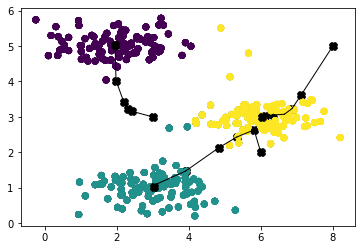

In [36]:
# Load the dummy dataset
X = load_data()

# Set initial centroids (pre-defined value just for a test purpose)
initial_centroids = np.array([[3,3],[6,2],[8,5]])
K = 3

# Number of iterations
max_iter = 10

centroids, idx = run_KMeans(X, initial_centroids, max_iter, plot_prog=True)

**3.4 Random Initialization**

In [37]:
def kmeans_random_init(X,K):
  randidx = np.random.permutation(X.shape[0])
  centroids = X[randidx[:K]]
  return centroids

K-Means iteration 0/9
K-Means iteration 1/9
(3, 2)
K-Means iteration 2/9
K-Means iteration 3/9
K-Means iteration 4/9
K-Means iteration 5/9
K-Means iteration 6/9
K-Means iteration 7/9
K-Means iteration 8/9
K-Means iteration 9/9


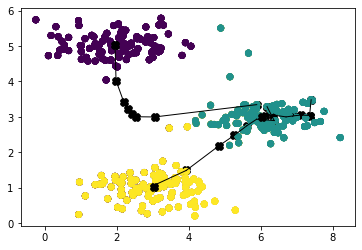

In [38]:
# Load the dummy dataset
X = load_data()

# Set initial centroids (pre-defined value just for a test purpose)
K = 3
initial_centroids = kmeans_random_init(X,K)


# Number of iterations
max_iter = 10

centroids, idx = run_KMeans(X, initial_centroids, max_iter, plot_prog=True)